# Agglomerative Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scip y.cluster.hierarchy import dendrogram, linkage
import sys

In [38]:
def find_clusters(input_data, link):
    row_index = -1
    col_index = -1
    clustering_order = []
    
    # Clustering n-1 times
    for k in range(1, input_data.shape[0]):
        min_val = sys.maxsize
        
        # Phase 1: Finding the minimum distance points
        for i in range(0, input_data.shape[0]):
            for j in range(0, input_data.shape[1]):
                if(input_data[i][j]<=min_val):
                    min_val = input_data[i][j]
                    row_index = i
                    col_index = j
                    
        clustering_order.append([row_index, col_index])
        
        # Phae 2: Updating proximity matrix
        
        for i in range(input_data.shape[0]):
            if i != col_index and i != row_index:
                if link == 1:
                    temp = min(input_data[row_index][i], input_data[col_index][i])
                else:
                    temp = max(input_data[row_index][i], input_data[col_index][i])
                input_data[col_index][i] = temp
                input_data[i][col_index] = temp
            
            input_data[row_index][i] = input_data[i][row_index] = np.Inf
        print(input_data)
        print("+"*50)
        
    print("="*50)
    print("Clustering order is: ", clustering_order)
    return clustering_order

In [39]:
def agglomerative_clustering(data, link=1):
    initial_distances = pairwise_distances(data, metric="euclidean")
    np.fill_diagonal(initial_distances, np.Inf)
    print("Proximity matrices: ")
    print(initial_distances)
    print("="*60)
    clusters = find_clusters(initial_distances, link)
    if link == 1:
        Z = linkage(data, "single")
    else:
        Z = linkage(data, "complete")
    fig, ax = plt.subplots(figsize=(10, 8))
    dendrogram(Z)

In [40]:
data = np.array([100., 200.,300., 400.,500., 250.,450., 500.,450., 750.]).reshape(5, 2)
data

array([[100., 200.],
       [300., 400.],
       [500., 250.],
       [450., 500.],
       [450., 750.]])

Proximity matrices: 
[[     inf 282.8427 403.1129 460.9772 651.9202]
 [282.8427      inf 250.     180.2776 380.7887]
 [403.1129 250.          inf 254.951  502.4938]
 [460.9772 180.2776 254.951       inf 250.    ]
 [651.9202 380.7887 502.4938 250.          inf]]
[[     inf 282.8427 403.1129      inf 651.9202]
 [282.8427      inf 250.          inf 250.    ]
 [403.1129 250.          inf      inf 502.4938]
 [     inf      inf      inf      inf      inf]
 [651.9202 250.     502.4938      inf      inf]]
++++++++++++++++++++++++++++++++++++++++++++++++++
[[     inf 282.8427 403.1129      inf      inf]
 [282.8427      inf 250.          inf      inf]
 [403.1129 250.          inf      inf      inf]
 [     inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf]]
++++++++++++++++++++++++++++++++++++++++++++++++++
[[     inf 282.8427      inf      inf      inf]
 [282.8427      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf]
 [     inf

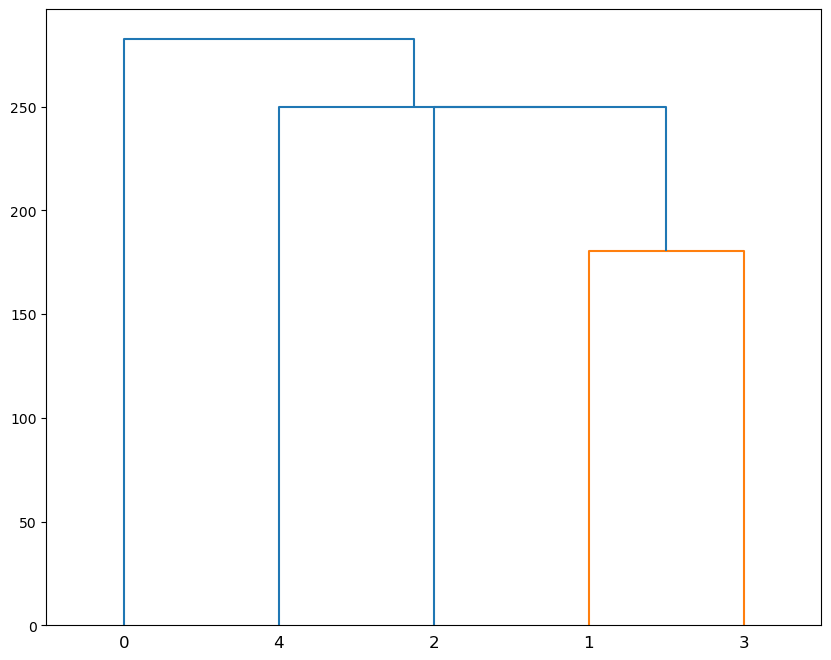

In [41]:
agglomerative_clustering(data, link=1)

Proximity matrices: 
[[     inf 282.8427 403.1129 460.9772 651.9202]
 [282.8427      inf 250.     180.2776 380.7887]
 [403.1129 250.          inf 254.951  502.4938]
 [460.9772 180.2776 254.951       inf 250.    ]
 [651.9202 380.7887 502.4938 250.          inf]]
[[     inf 460.9772 403.1129      inf 651.9202]
 [460.9772      inf 254.951       inf 380.7887]
 [403.1129 254.951       inf      inf 502.4938]
 [     inf      inf      inf      inf      inf]
 [651.9202 380.7887 502.4938      inf      inf]]
++++++++++++++++++++++++++++++++++++++++++++++++++
[[     inf 460.9772      inf      inf 651.9202]
 [460.9772      inf      inf      inf 502.4938]
 [     inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf]
 [651.9202 502.4938      inf      inf      inf]]
++++++++++++++++++++++++++++++++++++++++++++++++++
[[     inf      inf      inf      inf 651.9202]
 [     inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf]
 [     inf

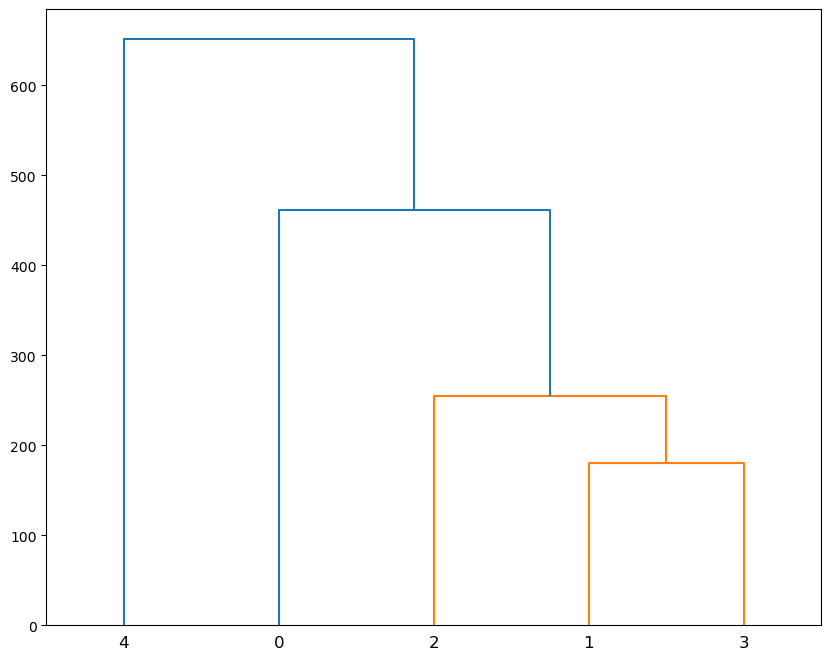

In [42]:
agglomerative_clustering(data, link=2)